In [5]:
from math import ceil
from accelerate import Accelerator
from loader.data_loader import *
from utils.utils import set_seed, dummy_load
from utils.config_utils import config_from_kwargs, update_config
from models.ndt1 import NDT1
import torch
import numpy as np
import os
from utils.eval_utils import load_model_data_local

In [1]:
eids = [24,29,127,128,171,172]
base_path = '/mnt/smb/locker/miller-locker/users/jx2484/results/'
model_acroynm ='ndt1'
num_train_sessions = 6

In [6]:
model_name = 'NDT1'
mask_name = 'mask_all'
n_time_steps = 400

model_config = f"/mnt/smb/locker/miller-locker/users/jx2484/code/autoencoder/src/configs/{model_acroynm}_stitching_eval.yaml"

configs = {
    'model_config': model_config,
    'model_path': f'{base_path}/finetune/num_session_{num_train_sessions}/model_NDT1/method_ssl/{mask_name}/stitch_True/{eids}/model_best.pt',
    'trainer_config': f'/mnt/smb/locker/miller-locker/users/jx2484/code/autoencoder/src/configs/finetune_sessions_trainer.yaml',
    'dataset_path': None, 
    'test_size': 0.2,
    'seed': 42,
    'mask_name': mask_name,
    'eids': eids,
    'stitching': True,
    'num_sessions': 1 
}  

In [7]:
max_space_length = 600
meta_data = {}
meta_data['max_space_length'] = max_space_length
print('encoder max space length:', max_space_length)
dataloader, num_neurons, datasets = make_loader(eids, batch_size=12) # for test, the batch size is the total number of trials 
meta_data['num_neurons'] = num_neurons
meta_data['num_sessions'] = len(eids)
meta_data['eids'] = eids

encoder max space length: 600
num_neurons:  [435, 316, 605, 728, 462, 265]
num_trials:  {'train': [72, 90, 39, 43, 79, 43], 'val': [24, 30, 13, 14, 26, 15], 'test': [24, 31, 14, 15, 27, 15]}
Succesfully constructing the dataloader for  train
Succesfully constructing the dataloader for  val
Succesfully constructing the dataloader for  test


In [8]:
# load your model and dataloader
model, accelerator = load_model_data_local(meta_data, **configs)


Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


seed set to 42


/mnt/smb/locker/miller-locker/users/jx2484/code/autoencoder/src/utils/eval_utils.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)['model']

(eval) masking mode:  all
(eval) masking ratio:  0.3
(eval) masking active:  False


In [10]:
# check parameters in embedder

embed_pos = model.encoder.embedder.embed_pos
embed_session = model.encoder.embedder.embed_session

<Axes: >

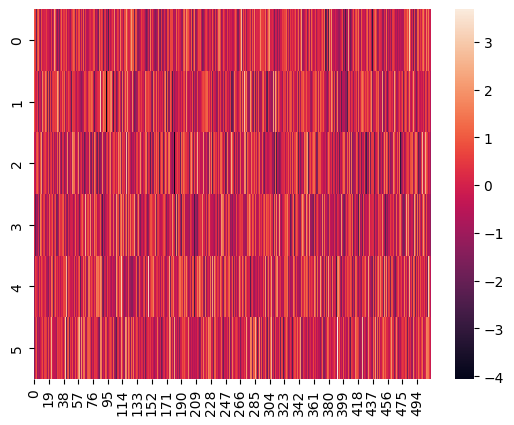

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.heatmap(embed_session.weight.detach().cpu().numpy()[eids,:])